# <center> Exploratory Data Analysis </center>


<center> Ontario's Electricity Market data </center>
<center> . </center>
<center> All data used for this project is publicly available and can be </center>
<center> accessed through Ontario's Independent Electricity System Operator's website </center>

<center> . </center>
<center> For more information please click on > <a href='https://www.ieso.ca/power-data'> ieso.ca </a> </center>

Prepared by: Behrouz ShakeriFard

contact: bshakeri@torontomu.ca

June 2023

## A Few Words About the Project

This project is a simple approach to utilizing basic Machine Learning algorithms (Logistic Regression, Decision Trees, and Random Forests) in order to predict price spikes in the electricity market.

There are commercial uses for these kind of models. For example, any building (residential or commercial) equipped with a WiFi capable Microcontroller Unit (MCU) and a sufficiently large energy storage unit (such as lithium-ion batteries) can use this model to *automatically* connect or disconnect from the grid, in order to avoid electricity consumption from the grid before price spikes occur, and thus reduce electricity cost. Think of it as a smart electricity management system that reads data from the local system operator, makes a prediction, and follows that with a decision.

Technical questions regarding the best practices for setting up the network connections of this kind of Internet of Things (IoT) devices (which, in this case, are also using Artificial Intelligence) are worth investigating. However, that would be beyond the scope of this notebook. 

#### Who is this notebook for?
Throughout this notebook, I will try to use casual language. The purpose is to make this project easy to understand and easy to follow. There is a trade-off, however. Some of the things that will be explained here, might seem too obvious for more advanced users. This, will inevitably make the notebook a bit longer. So, feel free to skip over large boxes of words if you are an experienced Machine Learning professional, and follow along with graphs.

#### Your level of experience and theoretical knowledge

I will move forward with the assumption that you have some familiarity with basic Machine Learning algorithms. The purpose of this notebook is to show:

1. how we can approach a relatively clean data set, and make sense of it;

2. to present a simple but useful application for a few Machine Learning algorithms that are relatively easy-to-understand and readily available for use, with the right data set.

This project will be broken down into several notebooks; and it is best suited for:

1. those who have earned an undergrad degree in the fields of Mathematics, Statistics, or Economics;
2. those enrolled in (or graduated from) Computer Science programme;
3. those enrolled in (or graduated from) a graduate level quantitative field (such as economics);
4. and PhD level students with understanding of scientific methods, with emphasis on empirical work which envolves data, regression analysis, cause and effect investigation, causal inference, etc. 

<hr>

## Introduction:
Ontario's Independent Electricity Systems Operator (IESO) records key variables of Ontario's electricity system, and this data is available in CSV format for anyone who is interested. These variables include hourly prices, hourly demand, hourly output, capacity for generation, and more. 

For the first step (which would be Exploratory Data Analysis or EDA) one year worth of data is more than enough. All that we need can be found in three files:

- Hourly Ontario's Electricity Price (HOEP)
- Ontario and Market Demand
- Generator Output and Capacity (GOC)

These files can be found here: <a> https://www.ieso.ca/en/Power-Data/Data-Directory </a>


Before getting started with the data we need to import a few useful python packages.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style

from pylab import *
from scipy.stats import linregress

# <center> Demand </center>

<center> After downloading the CSV file from IESO website, we will use Pandas library to load the data. </center>


In [2]:
# load the data and store it in memory, in form of a dataframe
d_2018 = pd.read_csv('PUB_Demand_2018_v1.csv')

In [3]:
# sanity check for the dataframe
d_2018.head()

,\\Hourly Demand Report,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,\\Created at 2019-01-31 07:30:09,NaN,NaN,NaN
1,\\For 2018,NaN,NaN,NaN
2,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084


In [4]:
# dropping top two rows 
d_2018.drop([0,1], inplace = True)

In [5]:
# sanity check
d_2018.head()

,\\Hourly Demand Report,Unnamed: 1,Unnamed: 2,Unnamed: 3
2,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084
5,2018-01-01,3,18453,15866
6,2018-01-01,4,18662,15725


In [6]:
# renaming columns
d_2018.columns=['Date', 'Hour','Market Demand','Ontario Demand']

# dropping the top row
d_2018.drop(2, inplace = True)

In [7]:
# third sanity check
d_2018.head()

,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084
5,2018-01-01,3,18453,15866
6,2018-01-01,4,18662,15725
7,2018-01-01,5,18060,15470


 All is well.

<hr>

<h3> Data Types </h3>

<p> Let's check the data type. </p>

In [8]:
d_2018.dtypes

Date              object
Hour              object
Market Demand     object
Ontario Demand    object
dtype: object

<h3>[Note]: </h3>

We can convert this into Date-time type. That should make things neat and tidy.

In [69]:
d_2018['Date'] = pd.to_datetime(d_2018['Date'])

Let's check:

In [70]:
d_2018.sample(7)

,Date,Hour,Market Demand,Ontario Demand,combined_datetime,HOUR,hour_timedelta
3298,2018-05-18,8,16239,13687,2018-05-18,8,0 days 08:00:00
6718,2018-10-07,20,15874,13992,2018-10-07,20,0 days 20:00:00
2906,2018-05-01,24,14066,11797,2018-05-01,24,1 days 00:00:00
4218,2018-06-25,16,17867,16005,2018-06-25,16,0 days 16:00:00
5922,2018-09-04,16,22653,21629,2018-09-04,16,0 days 16:00:00
631,2018-01-27,5,15799,12637,2018-01-27,5,0 days 05:00:00
7146,2018-10-25,16,18058,15647,2018-10-25,16,0 days 16:00:00


In [71]:
d_2018.dtypes

Date                  datetime64[ns]
Hour                          object
Market Demand                 object
Ontario Demand                object
combined_datetime     datetime64[ns]
HOUR                           int64
hour_timedelta       timedelta64[ns]
dtype: object

<center> <h3> Good! We fixed the Date column. </h3></center>

<hr>

 <h3> Hour </h3>

Let's convert the 'object' data to numeric.

In [23]:
d_2018['HOUR'] = pd.to_numeric(d_2018['Hour'], errors='coerce')  

In [24]:
d_2018.head()

,Date,Hour,Market Demand,Ontario Demand,combined_datetime,HOUR
3,2018-01-01,1,18974,16627,2018-01-01,1
4,2018-01-01,2,18447,16084,2018-01-01,2
5,2018-01-01,3,18453,15866,2018-01-01,3
6,2018-01-01,4,18662,15725,2018-01-01,4
7,2018-01-01,5,18060,15470,2018-01-01,5


In [65]:
d_2018['hour_timedelta'] = pd.to_timedelta(d_2018['HOUR'], unit='h')

In [72]:
d_2018.dtypes

Date                  datetime64[ns]
Hour                          object
Market Demand                 object
Ontario Demand                object
combined_datetime     datetime64[ns]
HOUR                           int64
hour_timedelta       timedelta64[ns]
dtype: object

In [67]:
d_2018['hour_timedelta'].head(5)

3   0 days 01:00:00
4   0 days 02:00:00
5   0 days 03:00:00
6   0 days 04:00:00
7   0 days 05:00:00
Name: hour_timedelta, dtype: timedelta64[ns]

In [73]:
d_2018.dtypes

Date                  datetime64[ns]
Hour                          object
Market Demand                 object
Ontario Demand                object
combined_datetime     datetime64[ns]
HOUR                           int64
hour_timedelta       timedelta64[ns]
dtype: object

In [77]:
d_2018['Hour'] = pd.to_datetime(d_2018['hour_timedelta'].astype(str).str.split(' ').str[-1]).dt.time

/tmp/ipykernel_84110/918890037.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d_2018['Hour'] = pd.to_datetime(d_2018['hour_timedelta'].astype(str).str.split(' ').str[-1]).dt.time


In [78]:
d_2018['Hour']

3       01:00:00
4       02:00:00
5       03:00:00
6       04:00:00
7       05:00:00
          ...   
8758    20:00:00
8759    21:00:00
8760    22:00:00
8761    23:00:00
8762    00:00:00
Name: Hour, Length: 8760, dtype: object

In [89]:
d_2018.dtypes

Date                  datetime64[ns]
Hour                          object
Market Demand                 object
Ontario Demand                object
combined_datetime     datetime64[ns]
HOUR                           int64
hour_timedelta       timedelta64[ns]
dtype: object

In [88]:
clear

In [85]:
clear

In [95]:


# Combine 'Date' and 'Hour' into a single datetime column
d_2018['datetime'] = pd.to_datetime(d_2018['Date'] + d_2018['hour_timedelta'], format='%Y-%m-%d %H:%M')

# Set the new datetime column as the index
d_2018.set_index('datetime', inplace=True)

# Drop the original 'Date' and 'Hour' columns if needed
#df = df.drop(['Date', 'Hour'], axis=1)

In [96]:
d_2018.sample(23)

,Date,Hour,Market Demand,Ontario Demand,combined_datetime,HOUR,hour_timedelta
datetime,,,,,,,
2018-06-09 07:00:00,2018-06-09,07:00:00,14625,12110,2018-06-09,7,0 days 07:00:00
2018-10-25 17:00:00,2018-10-25,17:00:00,18712,16428,2018-10-25,17,0 days 17:00:00
2018-05-09 18:00:00,2018-05-09,18:00:00,17158,15149,2018-05-09,18,0 days 18:00:00
2018-02-28 09:00:00,2018-02-28,09:00:00,18097,15871,2018-02-28,9,0 days 09:00:00
2018-12-13 03:00:00,2018-12-13,03:00:00,16076,14497,2018-12-13,3,0 days 03:00:00
2018-04-10 07:00:00,2018-04-10,07:00:00,17772,16750,2018-04-10,7,0 days 07:00:00
2018-01-23 23:00:00,2018-01-23,23:00:00,18252,16481,2018-01-23,23,0 days 23:00:00
2018-10-14 11:00:00,2018-10-14,11:00:00,15000,12951,2018-10-14,11,0 days 11:00:00
2018-01-25 12:00:00,2018-01-25,12:00:00,19689,18006,2018-01-25,12,0 days 12:00:00


<center> <h3> Good! We fixed the Hour! </h3></center>

<hr>

Good.

<hr>

###  Shape and Dimension 

In [97]:
# Let's look at dimension of this dataframe
shape(d_2018)

(8760, 7)

We have four columns and 8760 rows.

The first two columns are providing us with date and hour. The next column, 'Market Demand' represents the total energy that was supplied from the IESO-administered market. The IESO calculates total market demand by summing all output from generators registered in the market plus all scheduled imports to the province.

The last column, 'Ontario Demand' represents the  sum of all loads within Ontario which is supplied from the market, plus all line losses incurred on the IESO-controlled grid.

The number of rows reflects the total number of data points, which is 24 (24 hours for each day) multiplied by 365 (thenumber of days in a year). The total sum is:

In [1]:
# let's do some math
24 * 365

8760

In [10]:
# another sanity check
d_2018.tail()

,Date,Hour,Market Demand,Ontario Demand
8758,2018-12-31,20,18276,16195
8759,2018-12-31,21,18046,15668
8760,2018-12-31,22,17516,14987
8761,2018-12-31,23,17506,14560
8762,2018-12-31,24,16704,13828


In [11]:
# reseting the index helps us to navigate the dataframe with more ease
d_2018 = d_2018.reset_index()

In [13]:
# we will drop the index column
d_2018.drop(['index'], inplace=True, axis=1)

In [14]:
# final stage sanity check
d_2018.head()

,Date,Hour,Market Demand,Ontario Demand
0,2018-01-01,1,18974,16627
1,2018-01-01,2,18447,16084
2,2018-01-01,3,18453,15866
3,2018-01-01,4,18662,15725
4,2018-01-01,5,18060,15470


In [15]:
# final stage sanity check 
d_2018.tail()

,Date,Hour,Market Demand,Ontario Demand
8755,2018-12-31,20,18276,16195
8756,2018-12-31,21,18046,15668
8757,2018-12-31,22,17516,14987
8758,2018-12-31,23,17506,14560
8759,2018-12-31,24,16704,13828


#### All is Well.

<hr>

### Missing Values and Duplicates

Next, we will check for NAN, missing values or any other possible problems.

In [16]:
# checking for NAN or null values
d_2018.isnull().sum()

Date              0
Hour              0
Market Demand     0
Ontario Demand    0
dtype: int64

We don't have missing values!

In [17]:
# checking for duplicate values
d_2018.duplicated().sum()

0

We don't have any duplicate values. This is a very clean dataframe.

<hr>

### Data Types

It would be wise to check the data types. Some data sets are unnecessarily large, and therefore, resource intensive. In which case, we can change the data type to something that would be less resource intensive for later computations.

In [18]:
# check for data types
d_2018.dtypes

Date              object
Hour              object
Market Demand     object
Ontario Demand    object
dtype: object

In this example, we would like data to be of float or integer type. Below, we will implement this change.

In [19]:
# applying the numeric conversion
d_2018['Hour'] = d_2018['Hour'].apply(pd.to_numeric)

d_2018['Market Demand'] = d_2018['Market Demand'].apply(pd.to_numeric)
d_2018['Ontario Demand'] = d_2018['Ontario Demand'].apply(pd.to_numeric)

In [21]:
# sanity check
d_2018.dtypes

Date              object
Hour               int64
Market Demand      int64
Ontario Demand     int64
dtype: object

#### All is well.

<hr>

# <center> Exploring the Shape of Demand </center>

For this analysis, we will use Market Demand as the variable of interest for representing total demand. This is because (as we will see later) we will need to look at total generation as well; hence, we can allow the difference between total demand and local generation to represent electricity imports necessary for meeting the short-comings of the system.

It would be nice to see the shape of demand, and look for possible patterns in demand fluctuations in our 24-hour cycles. For this purpose, we can construct a loop that goes through twenty four rows, for any given day.

In [22]:
# we can specify any day here
day = 26

""" 
In order to get the 24 values that we want, we must multiply
the number 24 by the number of day that we are interested in minus one.
    
For example, in order to get the data for the third day of the year,
we need to multiply 3 - 1 and 24, which is 2 * 24 = 48. And then we can 
retrieve the immediate 24 data points that come after, which would be 
rows 49 to 73.
    
Similarly, for the fifth day of the year, we need to multiply 4 by 24.
And so on. 
"""

# starting from this point
starting_point = (day - 1 ) * 24
    
# this is a list that stores the 24 values that we are interested in
hrly_demand_list = []

# this loop will go through 24 values, representing 24 hours in a given day
for i in range(1,25):
    
    # The row that we are interested in
    row = starting_point + i
    hourly_demand = d_2018.iloc[row][2]
    hrly_demand_list.append(hourly_demand)
    

Next, we need the the x-axis with 24 digits, on which, we can graph the 24 data points that we have.

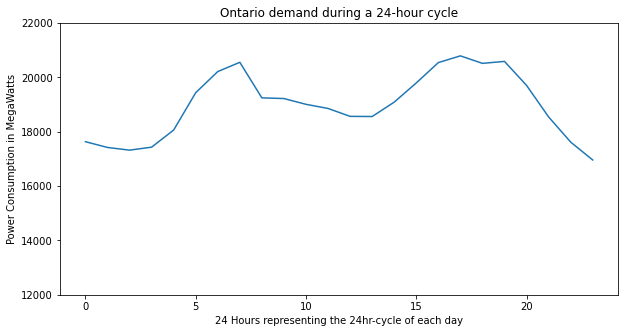

In [23]:

# the following lines will plot the list in order to show the 24-hour fluctuatons
x = np.arange(24)

# data = pd.DataFrame(data)
plt.figure(figsize=(10,5))
plt.plot(x,hrly_demand_list)

# title of the plot
plt.title('Ontario demand during a 24-hour cycle')

# x axis label
plt.xlabel('24 Hours representing the 24hr-cycle of each day')

# y axis label
plt.ylabel('Power Consumption in MegaWatts')

# significant numbers on the y-axis
plt.yticks([12000,14000,16000,18000,20000,22000])

# displaying the graph
plt.show()

The line shown in this graph shows the fluctuations of demand, as residents go through their daily activities. 

Ontario's demand for electricity is not uniform throughout the day, or season, or the entire year. For example, during mornings (soon after 5am) is when the first peak occurs. The next peak occurs after the work-hours end and residents come back home. 

But it is far from certain that the pattern repeats itself throughout the year. This is why we need a quick way of investigating the data.

Below, I have created a function that accepts a number between 1 and 365 as input (representing a sample day in normal year) and produces a graph, showing the 24-hour cycle of data (in this case demand) and its variation.

In [24]:
def show_me_demand(day):
    starting_point = (day - 1 ) * 24
    
    # this is a list that stores the 24 values that we are interested in
    hrly_demand_list = []

    # this loop will go through 24 values, representing 24 hours in a given day
    for i in range(1,25):
    
        # The row that we are interested in
        row = starting_point + i
        hourly_demand = d_2018.iloc[row][2]
        hrly_demand_list.append(hourly_demand)
        
    # the following lines will plot the list in order to show the 24-hour fluctuatons
    x = np.arange(24)
    
    #initiating the plot
    plt.figure()
    plt.plot(x,hrly_demand_list)
    # title of the plot
    plt.title('Ontario Electricity Demand During a 24-hour Cycle')
    # x axis label
    plt.xlabel('24 Hours representing the 24hr-cycle of each day')
    # y axis label
    plt.ylabel('Power Consumption in MegaWatts')
    # values on the y axis
    plt.yticks([12000,14000,16000,18000,20000,22000,24000])
    # displaying the graph
    plt.show()

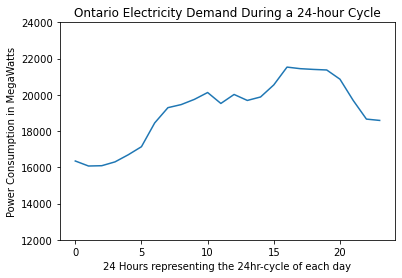

In [25]:
# let's call the function and look at day 12
# This would be January 12th
show_me_demand(12)

The graph above shows the 24-hour cycle of the 12th day of the year. This would be January 12th - a typical winter day. In order to understand the workings of this market, it would be wise to look at a few other days as well.

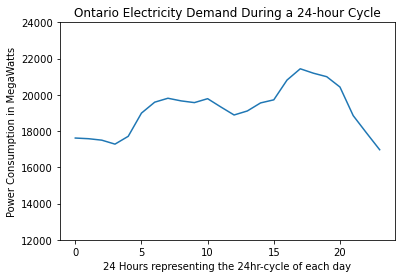

In [26]:
# day 42 - mid February
show_me_demand(43)

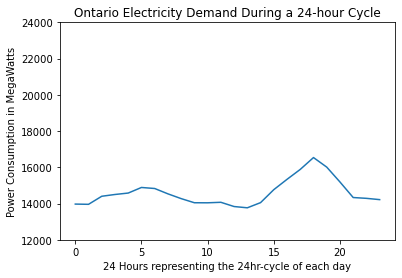

In [27]:
# day 112 - mid April
show_me_demand(112)

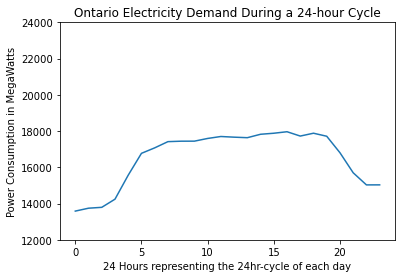

In [28]:
# day 143 - mid May
show_me_demand(142)

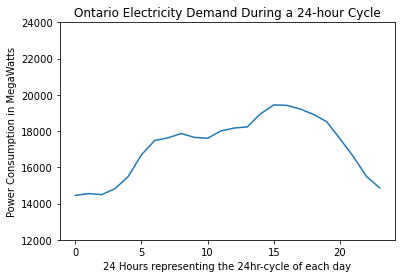

In [29]:
# day 165 - mid June
show_me_demand(165)

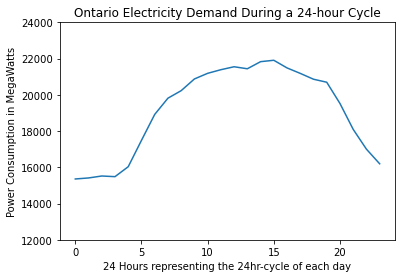

In [30]:
# day 210 - late July
show_me_demand(205)

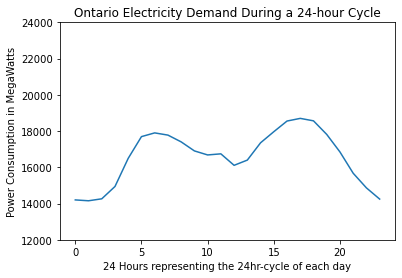

In [31]:
# day 290 - late september
show_me_demand(289)

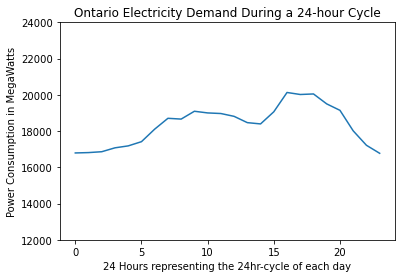

In [32]:
# day 342 - November
show_me_demand(342)

Evidently, demand shape is changing throughout the year, reflecting a changing pattern of behavior by the consumers. The question emerges: should we expect significant deviation from the 'mean' during certain hours, during certain seasons.

In order to investigate this, we could pivot this datafram, and utilize a heat map.

We implement this pivot in a way that each row would contain data for a day, each column would contain data for a given hour, and we will use 'Market Demand' as our source of data.

In [33]:
# implementing the pivot
pivot_d_2018 = pd.pivot(d_2018.sort_values('Hour'),index='Date',columns='Hour',values="Ontario Demand")

In [34]:
# sanity check
pivot_d_2018.head()

Hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,18974,18447,18453,18662,18060,18429,19137,19470,19333,19816,...,19605,20561,21717,23149,22944,22851,22468,21678,20233,19408
2018-01-02,19138,18169,18272,18064,18484,19221,20418,21870,22284,22603,...,21872,22010,22985,24161,23960,23865,23367,21823,20146,19628
2018-01-03,19030,18844,18504,18315,18757,19379,20617,21698,21990,22435,...,22577,22805,23689,24490,24010,23590,23295,22638,21469,19829
2018-01-04,18662,18461,18096,17847,18191,19063,20693,21939,22316,22367,...,21673,22234,22757,23866,23622,23677,23391,23095,21847,20603
2018-01-05,19752,19217,19237,19273,19194,19993,21096,22149,22797,23030,...,22763,22751,23057,24158,24185,23571,23802,23320,22111,21347


In [35]:
# sanity check
pivot_d_2018.shape

(365, 24)

Now let's graph the average demand during the 24-hour cycle, by taking the average of all 365 days, and representing it by one 24-hour graph

Text(0.5, 1.0, 'Annual Average Demand - expressed in a 24-hour cycle')

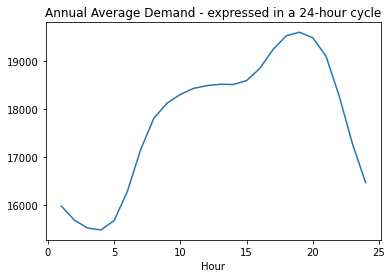

In [36]:
# this graph shows the average demand for electricity during the 24-hour cycle, 
# using the 8769 data points, reflecting 365 days of the year.
pivot_d_2018.mean().plot()
plt.title('Annual Average Demand - expressed in a 24-hour cycle')

Producing another dataframe with the difference between the value at each hour (total of 8760 values) and the mean value for that year, would be useful. This dataframe can inform us about where significant deviations from the norm have occured.

In [37]:
# creating a new dataframe for exploring significant deviations from the hourly average
demand_deviation = pivot_d_2018 - pivot_d_2018.mean()

### heatmap for deviations from the mean

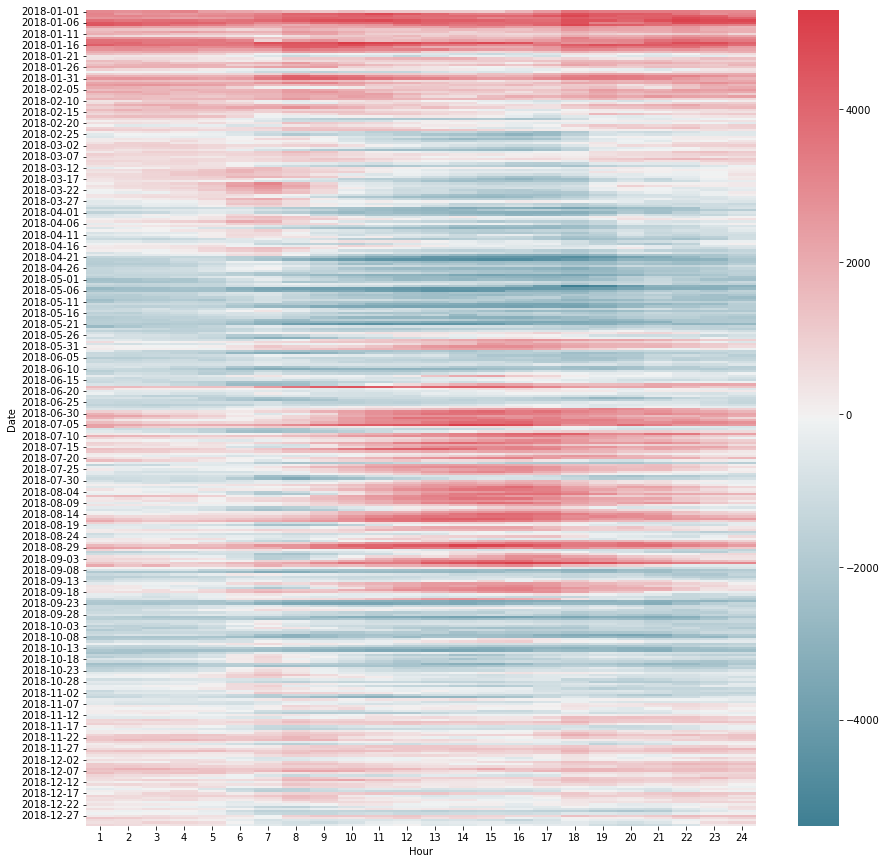

In [38]:
# setting the size of graph
plt.figure(figsize=(15,15))

# Define the custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# producing the graph
sns.heatmap(demand_deviation, cmap=cmap)
plt.show()

Red or lighter hues such as pink are indicating significant higher demand with comparison with average demand during the year. July and August also contain quite a bit of red spots, indicating that residents respond to warm weather by turning the air conditioner on.


Gredients that are closer to blue or green can be observed during April, early May, late September and October, when temperatures outside are expected to be fairly close to the temperatures that are considered comfortable room temperatures. In other words, temperatures around 15 degrees celsius to 25 degrees celsius are associated with less than average demand for electricity.

<hr>

# <center> Price </center>

Hourly Ontario Energy Price (HOEP) is set by the system operator, in this case, Ontario's Independent System Operator, or IESO.

Price is a numeric variable that reflects the market fluctuations. As demand fluctuates, energy producers (generators) chase market demand. IESO ensures that generators have sufficient incentive to enter the market when demand is high, by increasing the price, and thus, bringing sufficient incentive to the market for producers (generators) to start producing electricity.

The exact mechanism through which IESO sets the price is not discussed in this notebook, and is of no interest. Because the objective is to predict price without any knowledge of that mechanism. In other words, the aim of this project is to predict price, an hour from now, in the absence of any knowledge regarding how IESO sets the price.

Now let's start looking at some data.



In [2]:
# importing the file that is available on IESO website
pr_2018 = pd.read_csv('PUB_PriceHOEPPredispOR_2018.csv')

In [40]:
# sanity check
pr_2018.head()

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,\\Created at 2019-01-31 08:02:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\\For 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20


Looks good. We can remove the first two rows because they contain no useful information.

In [3]:
# dropping top two rows 
pr_2018.drop([0,1], inplace = True)

In [42]:
# sanity check
pr_2018.head()

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
2,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
5,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
6,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20


In [43]:
# checking the shape
pr_2018.shape

(8761, 9)

The 8761 rows reflect the entire 356 days of the year 2018, with the 24 hours of data that has been logged for each day.
Columns include date, hour, HOEP (the price that we are interested in), Predispatch prices provided by the IESO, and Operating Reserves.

### A few words about the market
Demand and supply rarely meet in the electricity systems. This is why operating reserves (stand-by resource that is available to be dispatched in short notice, in order to meet demand, should an unanticipated event take place in the real-time energy market) are important. More information about Operating Reserves may be accessed here: <a> https://www.ieso.ca/en/Sector-Participants/Market-Operations/Markets-and-Related-Programs/Operating-Reserve-Markets </a>


For this analysis, we are interested in HOEP. However, it is worth bearing in mind that the operating reserve (10 min Synched) might be a good forward indicator of possible price spikes in the electricity market. We might use this column in the future. For now, however, we will only keep Date, Hour, and HOEP.

In [ ]:
# renaming columns
#pr_2018.columns=['Date','Hour','HOEP','Predisp 1','Predisp 2','Predisp 3','OperatingReserve 10minSynch', 'OR 10','OR 30']

In [4]:
# let's remove the unnecessary columns
pr_2018 = pr_2018.drop(pr_2018.columns[[3,4,5,6,7,8]], axis=1) 

In [45]:
# sanity check
pr_2018.head()

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2
2,Date,Hour,HOEP
3,2018-01-01,1,51.29
4,2018-01-01,2,43.59
5,2018-01-01,3,93.60
6,2018-01-01,4,54.78


In [5]:
# renaming columns
pr_2018.columns=['Date','Hour','HOEP']

In [6]:
# dropping the top row
pr_2018.drop([2], inplace = True)

In [7]:
# reseting the index helps us to navigate the dataframe with more ease
pr_2018 = pr_2018.reset_index()

In [8]:
# Dropping the column named 'Index'
pr_2018.drop(['index'], axis=1, inplace = True)

# sanity check
pr_2018.head()

,Date,Hour,HOEP
0,2018-01-01,1,51.29
1,2018-01-01,2,43.59
2,2018-01-01,3,93.60
3,2018-01-01,4,54.78
4,2018-01-01,5,14.35


In [51]:
# sanity check
pr_2018.tail()

,Date,Hour,HOEP
8755,2018-12-31,20,5.62
8756,2018-12-31,21,8.95
8757,2018-12-31,22,5.81
8758,2018-12-31,23,2.87
8759,2018-12-31,24,0.00


In [52]:
pr_2018.shape

(8760, 3)

In [53]:
365 * 24

8760

### All is well.

Next we are going to check the Data Types, check for missing values, duplicates, and the distribution of our variable of interest.

In [54]:
# check the data type
pr_2018.dtypes

Date    object
Hour    object
HOEP    object
dtype: object

Changing the data type to numeric (integer) would make the dataframe smaller. So let's do that.

In [9]:
# converting to numeric
pr_2018['HOEP'] = pr_2018['HOEP'].apply(pd.to_numeric)

# converting to numeric
pr_2018['Hour'] = pr_2018['Hour'].apply(pd.to_numeric)

In [10]:
# sanity check
pr_2018.dtypes

Date     object
Hour      int64
HOEP    float64
dtype: object

### Missing Values

Before moving forward, let's check for missing values.

In [57]:
# checking for NAN or null values
pr_2018.isnull().sum()

Date    0
Hour    0
HOEP    0
dtype: int64

We don't have missing values. That's good!

### Duplicate values

In [58]:
# checking duplicate values
pr_2018.duplicated().sum()

0

Gladly, we do not have 'duplicate value' problem.

In [59]:
# Last sanity check
pr_2018.shape

(8760, 3)

<hr>

## Pivot

Implementing a pivot is common practice for time-series analysis. It will also be useful for producing graphs as well.

In [11]:
pd.pivot(pr_2018.sort_values('Hour'),index='Date',columns='Hour',values="HOEP")

Hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,51.29,43.59,93.60,54.78,14.35,18.60,21.72,40.89,20.75,74.57,...,26.73,42.12,42.28,44.84,42.22,41.06,43.76,48.38,42.58,38.14
2018-01-02,31.12,10.76,14.34,0.29,1.43,14.36,19.10,34.90,43.72,46.03,...,34.36,29.98,42.86,42.33,40.37,42.44,42.29,41.64,8.01,29.72
2018-01-03,2.31,19.43,0.00,0.00,0.00,0.00,32.26,66.58,79.95,88.93,...,40.84,56.34,82.30,89.30,88.01,81.94,83.84,84.16,76.34,46.04
2018-01-04,15.77,4.94,6.47,0.75,0.00,0.42,23.91,64.70,67.25,66.97,...,13.33,13.35,21.10,54.40,56.01,58.91,58.82,60.96,73.71,106.23
2018-01-05,18.50,13.33,13.36,13.34,13.45,9.69,68.23,77.02,79.79,77.02,...,68.42,75.97,77.90,105.23,112.51,95.42,128.05,77.94,69.07,67.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,8.10,6.47,9.31,0.00,0.00,0.00,0.00,11.53,14.35,14.37,...,7.46,5.95,8.67,14.36,14.37,41.83,14.36,27.71,3.76,0.00
2018-12-28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,...,5.22,0.00,0.00,4.54,4.22,5.57,0.38,2.68,0.00,0.00
2018-12-29,0.00,0.00,0.00,0.00,0.00,0.00,0.97,8.01,15.64,43.55,...,9.25,13.54,18.00,33.00,31.57,30.98,25.80,22.79,22.81,25.14


In [12]:
# Let's save the pivoted dataframe with a new name
pivoted_pr_2018 = pd.pivot(pr_2018.sort_values('Hour'),index='Date',columns='Hour',values="HOEP")

In [13]:
pivoted_pr_2018.to_csv('pivot_table_price.csv')

Looking at the mean value of prices, for each hour, would give us a good idea of how prices fluctuate during the 24-hour cycle.

Text(0.5, 1.0, 'Annual Average Price - expressed in a 24-hr cycle')

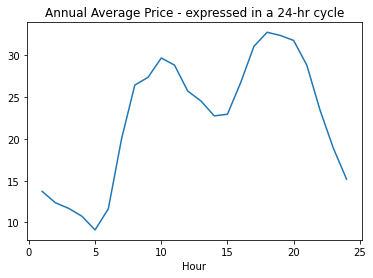

In [62]:
# this graph shows the average price of electricity during the 24-hour cycle, using 
# the 8760 data points, reflecting 365 days of the year.
pivoted_pr_2018.mean().plot()

# We can give it a title
plt.title('Annual Average Price - expressed in a 24-hr cycle')

Price fluctuations reflect fluctuating demand, as electricity consumers go about their daily lives. But perhaps more importantly, we can see that for the most part, prices remain between 10 dollars and 35 dollars for every MegaWatt of power. This range may become useful later, as we try to define 'spikes' in prices.

<hr>

## Significant deviations from the mean

Producing another dataframe with the difference between the value at each hour (total of 8760 values) and the mean value for that year, would be useful. This dataframe can inform us about where significant deviations from the norm have occured.

In [63]:
price_spikes = pivoted_pr_2018 - pivoted_pr_2018.mean()

In order to better understand price spikes, we can utilize a 'heatmap' graph. Seaborn library is going to be useful here.

<AxesSubplot:xlabel='Hour', ylabel='Date'>

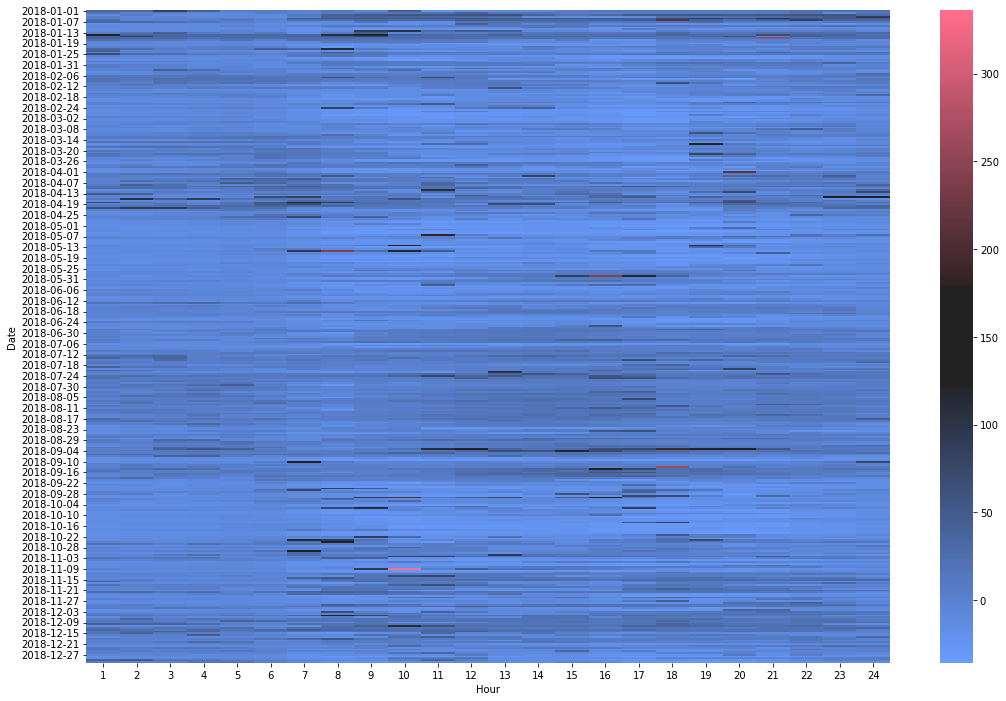

In [64]:
# Set the size of the graph
plt.figure(figsize=(18,12))

# color gradient
cmap = sns.diverging_palette(255, 2, s=100, l=65, sep=40, center="dark", as_cmap=True)

# title of the graph
plt.title('Heatmap showing all prices - spikes are dark or red')

# Produce the Seaborn Heat Map
sns.heatmap(price_spikes, cmap = cmap)

Significant deviation from the average prices can be observed during the months of January, mid April, and throughout the summer (entirety of July and August, and even some price spikes for September).

<hr>

## What does the Price distribution look like?

We don't know what does the distribution look like. Distribution could be Guassian, or it could be skewed to either side. We can use a histogram to look at the distribution. 

Remember, a Guassian distribution with narrow and thin tails would translate into a very narrow potential for electricity bill reduction, and consequently, a negligible business opportunity.

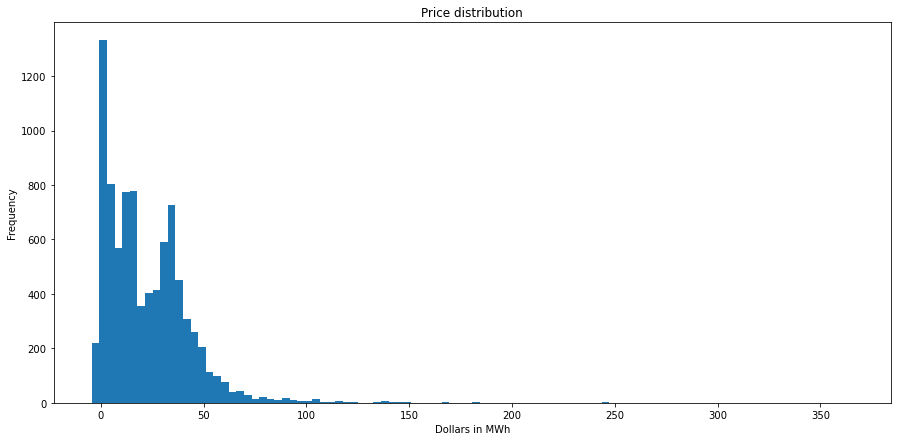

In [65]:
# initiate the plot and setting the size
plt.figure(figsize=(15,7))

# specifying the data column and plot details
pr_2018['HOEP'].plot(kind='hist', bins=100)

# x-axis title
plt.xlabel('Dollars in MWh')

#title for the plot
plt.title('Price distribution')

# show the plot
plt.show()

One of the central questions of this project (and by extention, the business opportunity that it presents) is the distribution of prices. Large frequency of low prices (prices below $10 for each MWh of electricity) create an "Arbitrage-like" opportunity for consumers to buy more than they need, store in a storage unit (large-capacity Lithium-ion bank) and utilize the storage when prices go beyond normal.

Essentially, if each household chooses the two thresholds (upperbound and lowerbound of consumption) optimally, the opportunity to buy cheap and disengage from the market during price spikes is an opportunity for saving money for the household, as well as an opportunity for the entreprenuer to generate income through bringing this service to the households, and give them the tools needed for reducing cost, while simultanously improving system reliability for the electricity grid. Furthermore, this project could contribute to reducing greenhouse-gas emissions in the province (natural gas is often used in order to respond to short-notice positive shocks to demand), and create employment for technicians who would install the necessary hardware.

## Mean, Median and Mode.

In [66]:
pr_2018['HOEP'].mean()

22.44443493150686

In [67]:
pr_2018['HOEP'].median()

17.045

In [68]:
pr_2018['HOEP'].mode().values[0]

0.0

This is inteesting, because the most common value for prices is actually ZERO dollars. This is very useful. Because it makes a great business opportunity for buying electricity at zero dollars, and storing it. And then disconnecting from the grid when prices go above certain level; say, mean value (which is just short of 22.5 dollars).

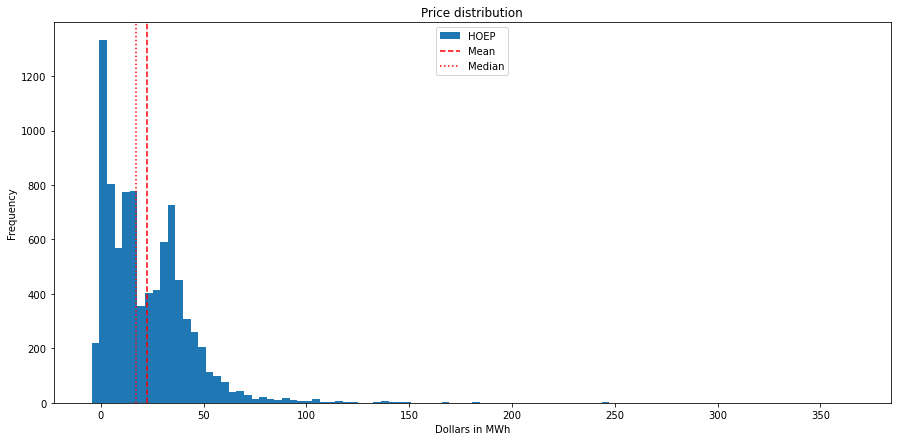

In [109]:
# initiate the plot and setting the size
plt.figure(figsize=(15,7))

# specifying the data column and plot details
pr_2018['HOEP'].plot(kind='hist', bins=100)

# let's get the mean and median values
mean_value = pr_2018['HOEP'].mean()
median_value = pr_2018['HOEP'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='red', linestyle=':', label='Median')

# x-axis title
plt.xlabel('Dollars in MWh')

#title for the plot
plt.title('Price distribution')

# add a legend
plt.legend(loc='upper center')

# show the plot
plt.show()

<hr>

Furthermore, let's take a look at a few 24-hour cycles, and see how prices fluctuate during a few sample days.

For this purpose, we are going to define a function.

In [107]:
def show_me_price(day):
    starting_point = (day - 1 ) * 24
    
    # this is a list that stores the 24 values that we are interested in
    hrly_price_list = []

    # this loop will go through 24 values, representing 24 hours in a given day
    for i in range(1,25):
    
        # The row that we are interested in
        row = starting_point + i
        hourly_price = pr_2018.loc[row]['HOEP']
        hrly_price_list.append(hourly_price)
        
    # the following lines will plot the list in order to show the 24-hour fluctuatons
    x = np.arange(24)

    # data = pd.DataFrame(data)
    plt.figure()
    plt.plot(x,hrly_price_list)
    
    # creating the appropriate title for the graph
    plt.title('Ontario Hourly Price during a 24-hour cycle')
    
    # Fill the area between median and mean
    plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')
    
    # x axis label
    plt.xlabel('24 Hours representing the 24hr-cycle of each day')
    
    # y axis label
    plt.ylabel('Price expressed in dollars, for each MWh')
    
    plt.legend()
    plt.show()

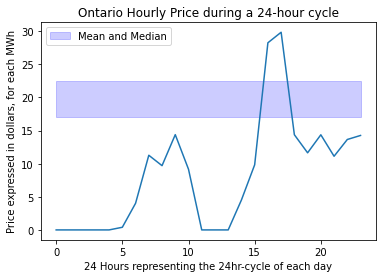

In [110]:
# day 20 - January
show_me_price(20)

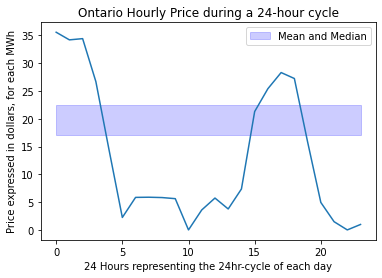

In [111]:
# day 77 - March 
show_me_price(77)

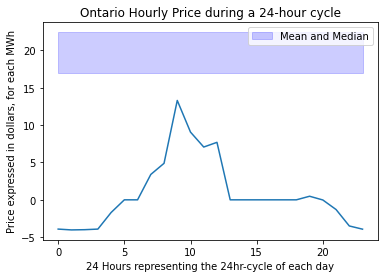

In [112]:
# day 130 - early May
show_me_price(130)

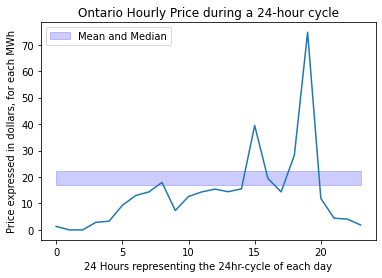

In [113]:
# day 136 - May
show_me_price(136)

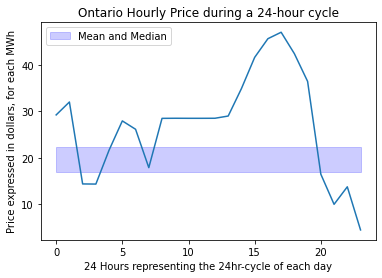

In [114]:
# day 200 - a summer day in July 
show_me_price(200)

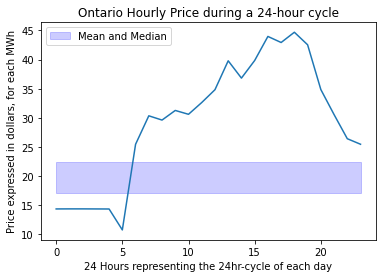

In [115]:
# day 238 - a summer day
show_me_price(238)

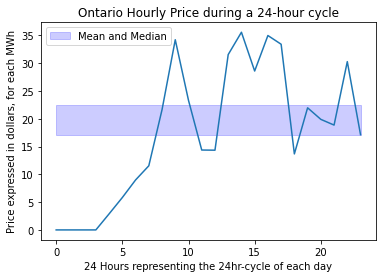

In [116]:
# day 300
show_me_price(300)

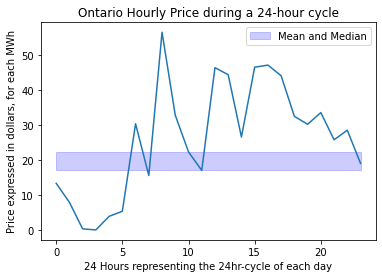

In [117]:
# day 340 - winter
show_me_price(340)

Having sufficiently large storage unit to allow the user to disconnect when prices reach "high level" is going to be a considerable opportunity for reducing cost. However, there is much to be done regarding this threshhod.

The threshhold in question fluctuates from one season to next, which makes the system more complex. We will address this question before setting up the machine learning algorithm.

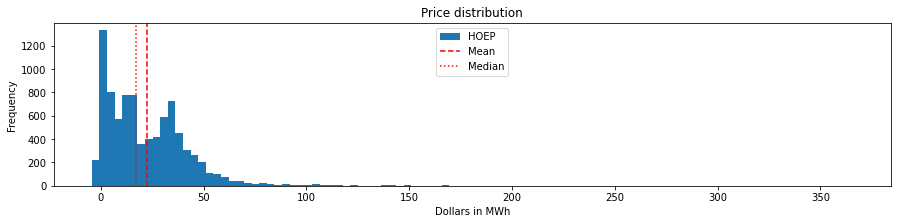

In [79]:
# let's have one last look at the price distribution

# initiate the plot and setting the size
plt.figure(figsize=(15,3))

# specifying the data column and plot details
pr_2018['HOEP'].plot(kind='hist', bins=100)

# let's get the mean and median values
mean_value = pr_2018['HOEP'].mean()
median_value = pr_2018['HOEP'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='red', linestyle=':', label='Median')

# x-axis title
plt.xlabel('Dollars in MWh')

#title for the plot
plt.title('Price distribution')

# add a legend
plt.legend(loc='upper center')

# show the plot
plt.show()

<hr>

# <center> Generator Output and Capacity </center>

We have looked at demand and price. Next, we will look at supply of electricity to the market.

Generator Output and Capacity data provides close-to-real-time output levels for Ontario’s generators
registered as a market participant, and their capacity to produce. It is published
hourly, as soon as the data is available, containing data from generators with
capacities 20 MW or greater, registered with the IESO. For this analysis we are using the same year data (2018), available as excel sheets. 

More information is available here: http://reports.ieso.ca/docrefs/helpfile/GenOutputCapability_h4.pdf



In [80]:
# we need to import this package for reading excel files that hold our data
from pandas import read_excel

Output is the actual energy production of the unit or facility. The hourly output is the facility’s five-minute
outputs averaged over an hour.


In [81]:
# Extracting Generator Output and Capacity data

# let's create a dictionary
GOC_2018 = {}

# these are the name of the sheets in the excel file
OutCap=['Output','Capabilities']

# read the excel file
xl_file = pd.ExcelFile('GOC-2018.xlsx')

# this line will extract separate sheets in an excel file
dfs = {sheet_name: xl_file.parse(sheet_name)
          for sheet_name in xl_file.sheet_names}

# This cell may take up to a minute to execute

In [82]:
# sanity check
dfs

{'Output':            Date  Hour  TOTAL  ABKENORA  ADELAIDE  AGUASABON  ALEXANDER  \
 0    2018-01-01     1  18401        16      27.0         36         49   
 1    2018-01-01     2  18082        16      37.0         36         49   
 2    2018-01-01     3  18208        16      40.0         36         49   
 3    2018-01-01     4  17974        16      42.0         36         49   
 4    2018-01-01     5  17797        16      39.0         36         49   
 ...         ...   ...    ...       ...       ...        ...        ...   
 8755 2018-12-31    20  17853        10      23.0         16         45   
 8756 2018-12-31    21  17736        10      43.0         37         45   
 8757 2018-12-31    22  17227        10       8.0         16         45   
 8758 2018-12-31    23  17232        10      54.0         25         45   
 8759 2018-12-31    24  16500        10       1.0         15         45   
 
       AMARANTH  AMHERST ISLAND  APIROQUOIS  ...  WELLS  WEST LINCOLN NRWF  \
 0        

The dictionary above is storing hourly data on output, as well as hourly data on capabilities of each of the nearly 180 electricity generators registered with the IESO.


In [83]:
# all the capacity in the system
cap = pd.DataFrame()
cap = dfs['Capabilities']

In [84]:
# sanity check
cap.shape

(8760, 179)

Each column is for one generator in the system

In [85]:
# sanity check
cap

,Date,Hour,ABKENORA,ADELAIDE,AGUASABON,ALEXANDER,AMARANTH,AMHERST ISLAND,APIROQUOIS,ARMOW,...,WELLS,WEST LINCOLN NRWF,WESTWINDSOR,WHITBYCGS,WHITEDOG,WINDSOR AIRPORT SF,WOLFE ISLAND,YORKCGS-G1,YORKCGS-G2,ZURICH
0,2018-01-01,1,14,29.0,52,65,12.0,NaN,93,33.0,...,220.0,47.0,133,56,50.0,0.0,20.0,232,232,85.0
1,2018-01-01,2,14,33.0,52,65,2.0,NaN,93,50.0,...,220.0,33.0,133,56,50.0,0.0,3.0,232,232,96.0
2,2018-01-01,3,14,39.0,52,65,2.0,NaN,93,80.0,...,220.0,22.0,133,56,50.0,0.0,1.0,232,232,95.0
3,2018-01-01,4,14,39.0,52,65,40.0,NaN,93,37.0,...,220.0,11.0,133,56,50.0,0.0,0.0,232,232,91.0
4,2018-01-01,5,14,38.0,52,65,56.0,NaN,93,136.0,...,220.0,16.0,133,56,50.0,0.0,0.0,232,232,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,4,41.0,52,65,54.0,52.0,93,149.0,...,220.0,96.0,133,55,73.0,0.0,40.0,232,232,92.0
8756,2018-12-31,21,4,50.0,52,65,28.0,36.0,93,168.0,...,220.0,155.0,133,55,73.0,0.0,32.0,232,232,97.0
8757,2018-12-31,22,4,45.0,52,65,11.0,34.0,93,139.0,...,220.0,141.0,133,55,73.0,0.0,26.0,232,232,91.0
8758,2018-12-31,23,4,50.0,52,65,52.0,60.0,93,68.0,...,220.0,81.0,133,55,73.0,0.0,27.0,232,232,58.0


### missing values and duplicate

In [86]:
# checking for NAN or null values
cap.isnull().sum()

Date                   0
Hour                   0
ABKENORA               0
ADELAIDE              48
AGUASABON              0
                      ..
WINDSOR AIRPORT SF    48
WOLFE ISLAND          48
YORKCGS-G1             0
YORKCGS-G2             0
ZURICH                48
Length: 179, dtype: int64

We have some missing values, but that is normal. Because generators are not always connected to the grid.

In [87]:
# sanity check
cap.duplicated().sum()

0

We have no duplicate values. We can now move on to capabilities.

### note:

For the purpose of this analysis we will sum up all capabilities in the dataframe, in order to report total generation capabilities present in the province. This is going to help us in the future. Knowing the percentage of our available resources that are in use, is going to be informative, as we shall see.

In [88]:
# summing up capabilities
cap = dfs['Capabilities']

# making a new row to store all capacities
cap['sum'] = cap.iloc[:,2:180].sum(axis=1)


In [89]:
# sanity check
cap

,Date,Hour,ABKENORA,ADELAIDE,AGUASABON,ALEXANDER,AMARANTH,AMHERST ISLAND,APIROQUOIS,ARMOW,...,WEST LINCOLN NRWF,WESTWINDSOR,WHITBYCGS,WHITEDOG,WINDSOR AIRPORT SF,WOLFE ISLAND,YORKCGS-G1,YORKCGS-G2,ZURICH,sum
0,2018-01-01,1,14,29.0,52,65,12.0,NaN,93,33.0,...,47.0,133,56,50.0,0.0,20.0,232,232,85.0,28628.0
1,2018-01-01,2,14,33.0,52,65,2.0,NaN,93,50.0,...,33.0,133,56,50.0,0.0,3.0,232,232,96.0,28729.0
2,2018-01-01,3,14,39.0,52,65,2.0,NaN,93,80.0,...,22.0,133,56,50.0,0.0,1.0,232,232,95.0,28899.0
3,2018-01-01,4,14,39.0,52,65,40.0,NaN,93,37.0,...,11.0,133,56,50.0,0.0,0.0,232,232,91.0,28583.0
4,2018-01-01,5,14,38.0,52,65,56.0,NaN,93,136.0,...,16.0,133,56,50.0,0.0,0.0,232,232,92.0,29352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,4,41.0,52,65,54.0,52.0,93,149.0,...,96.0,133,55,73.0,0.0,40.0,232,232,92.0,30912.0
8756,2018-12-31,21,4,50.0,52,65,28.0,36.0,93,168.0,...,155.0,133,55,73.0,0.0,32.0,232,232,97.0,30968.0
8757,2018-12-31,22,4,45.0,52,65,11.0,34.0,93,139.0,...,141.0,133,55,73.0,0.0,26.0,232,232,91.0,31016.0
8758,2018-12-31,23,4,50.0,52,65,52.0,60.0,93,68.0,...,81.0,133,55,73.0,0.0,27.0,232,232,58.0,30787.0


In [90]:
# sanity check
cap['sum']

0       28628.0
1       28729.0
2       28899.0
3       28583.0
4       29352.0
         ...   
8755    30912.0
8756    30968.0
8757    31016.0
8758    30787.0
8759    31618.0
Name: sum, Length: 8760, dtype: float64

<hr>

## A few words about the market

As mentioned earlier, electricity market is rarely in equilibrium. Market demand fluctuates according to activities in the economy that demand electricity. System's operator (IESO) provides incentive to registered generators to join the market, and that incentive is price. In other words, price is both the mechanism through which signals are transmitted, and also the evidence of an imbalance in the system.

But generation alone (supply) cannot provide us with adequate information. Just like an economy that experiences inflation  - as the total output (GDP) gets close to the potential output (full employment) - electricity market experiences a similar phenomenon as electricity generation get close to the capacity to generate (prices inflate).

Therefore, having a variable that expresses how close the market is to its full potential (output/capacity ratio) can be useful.

In order to construct such variable, we need total (sum of) capacities in the system, and total (sum of) output in the system. Next, we will look at total generation as a variable.

<hr>

## note:

As we did with capacity, we will sum up all output in order to report the hourly output of the province.

In [91]:
# summing up total output
output = dfs['Output']
output['sum'] = output.iloc[:,3:180].sum(axis=1)

In [92]:
# sanity check
output

,Date,Hour,TOTAL,ABKENORA,ADELAIDE,AGUASABON,ALEXANDER,AMARANTH,AMHERST ISLAND,APIROQUOIS,...,WEST LINCOLN NRWF,WESTWINDSOR,WHITBYCGS,WHITEDOG,WINDSOR AIRPORT SF,WOLFE ISLAND,YORKCGS-G1,YORKCGS-G2,ZURICH,sum
0,2018-01-01,1,18401,16,27.0,36,49,6.0,NaN,70,...,46.0,0,57,3.0,0.0,17.0,0,0,88.0,18401.0
1,2018-01-01,2,18082,16,37.0,36,49,1.0,NaN,70,...,32.0,0,57,2.0,0.0,2.0,0,0,98.0,18082.0
2,2018-01-01,3,18208,16,40.0,36,49,3.0,NaN,70,...,19.0,0,57,2.0,0.0,0.0,0,0,95.0,18208.0
3,2018-01-01,4,17974,16,42.0,36,49,47.0,NaN,70,...,12.0,0,57,1.0,0.0,0.0,0,0,94.0,17974.0
4,2018-01-01,5,17797,16,39.0,36,49,61.0,NaN,70,...,17.0,0,57,1.0,0.0,0.0,0,0,94.0,17797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,17853,10,23.0,16,45,54.0,47.0,87,...,84.0,0,57,47.0,0.0,38.0,0,0,93.0,17853.0
8756,2018-12-31,21,17736,10,43.0,37,45,22.0,27.0,87,...,167.0,0,57,55.0,0.0,28.0,0,0,98.0,17736.0
8757,2018-12-31,22,17227,10,8.0,16,45,13.0,17.0,87,...,91.0,0,57,46.0,0.0,24.0,0,0,90.0,17227.0
8758,2018-12-31,23,17232,10,54.0,25,45,55.0,62.0,86,...,72.0,0,57,46.0,0.0,28.0,0,0,52.0,17232.0


Having a function which would accept a numerical variable (between 1 and 365) and produce the shape of the output during a 24-hr cycle, would allow us to see how Ontario's electricity producers react to the market's fluctuating demand.

In [93]:
def show_me_output(day):
    starting_point = (day - 1 ) * 24
    
    # this is a list that stores the 24 values that we are interested in
    hrly_gen_list = []

    # this loop will go through 24 values, representing 24 hours in a given day
    for i in range(1,25):
    
        # The row that we are interested in
        row = starting_point + i
        hourly_gen = int(output.loc[row]['TOTAL'])
        hrly_gen_list.append(hourly_gen)
        
    # the following lines will plot the list in order to show the 24-hour fluctuatons
    x = np.arange(24)

    # data = pd.DataFrame(data)
    plt.figure()
    plt.plot(x,hrly_gen_list)
    # creating the appropriate title for the graph
    plt.title('Ontario Hourly Output during a 24-hour cycle')
    
    # x axis label
    plt.xlabel('24 Hours representing the 24hr-cycle of each day')
    
    # y axis label
    plt.ylabel('MegaWatt-hour of electricity')
    
    # show the plot
    plt.show()

We can test this function by giving it integers (as input) and observe the graph that it produces.

### 24-hour cycles

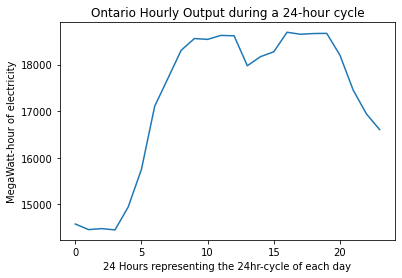

In [94]:
# a day in January
show_me_output(22)

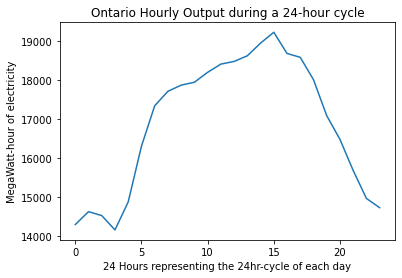

In [95]:
# a day in May
show_me_output(152)

Furthermore, we can investigate the distribution of this variable, to see how often different levels of output occur.

### Distribution

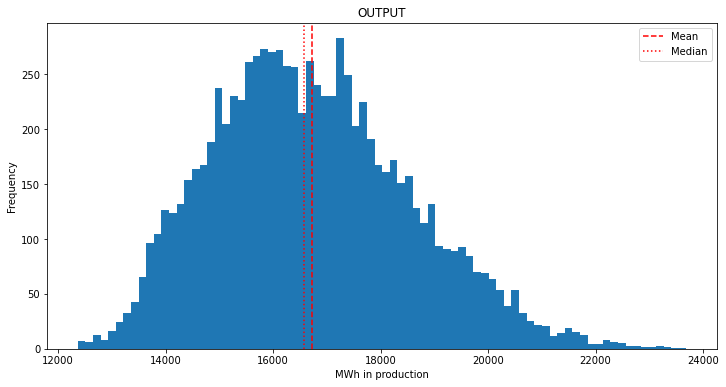

In [106]:
# initiate the plot and setting the size
plt.figure(figsize=(12,6))

# let's get the mean and median values
mean_value = output['TOTAL'].mean()
median_value = output['TOTAL'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='red', linestyle=':', label='Median')

# x-axis title
plt.xlabel('MWh in production')

# y-axis title
plt.ylabel('frequency of occurence')

#title for the plot
plt.title('OUTPUT')

# add a legend
plt.legend(loc='upper center')

output['sum'].plot(kind='hist',bins=80)
plt.show()


We will repeat the process we did for the price dataframe, in order to investigate daily fluctuations of output during the one-year time frame that we are looking at.

### Pivot table

In [99]:
# pivit table
pd.pivot(output.sort_values('Hour'),index='Date',columns='Hour',values="sum")

Hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,18401.0,18082.0,18208.0,17974.0,17797.0,18044.0,19004.0,19280.0,19109.0,19584.0,...,19323.0,20219.0,21505.0,22749.0,22351.0,22214.0,22011.0,21045.0,19421.0,19152.0
2018-01-02,19058.0,18002.0,18032.0,17714.0,18218.0,18912.0,20093.0,21457.0,21884.0,22146.0,...,21344.0,21558.0,22467.0,23337.0,23188.0,22758.0,22966.0,21386.0,19855.0,19366.0
2018-01-03,18324.0,18245.0,18067.0,18005.0,18332.0,18474.0,19376.0,20645.0,21243.0,21629.0,...,20870.0,21568.0,22271.0,22991.0,22600.0,21715.0,21359.0,20605.0,19765.0,18302.0
2018-01-04,17326.0,17035.0,17236.0,17408.0,17601.0,18502.0,19589.0,20531.0,21027.0,20848.0,...,20082.0,20232.0,20435.0,21590.0,21486.0,21670.0,21304.0,20937.0,20798.0,20150.0
2018-01-05,18680.0,17650.0,17542.0,17691.0,18304.0,18662.0,19736.0,20596.0,20970.0,21033.0,...,21054.0,21823.0,22688.0,23450.0,23692.0,23014.0,23154.0,22437.0,20962.0,20111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,16031.0,15919.0,16003.0,15830.0,16097.0,16499.0,16888.0,18438.0,18969.0,19133.0,...,19104.0,19282.0,19551.0,20545.0,20394.0,20154.0,19939.0,19458.0,18485.0,17721.0
2018-12-28,17026.0,16405.0,16119.0,15936.0,15864.0,16153.0,16793.0,18006.0,18284.0,18415.0,...,18979.0,18496.0,18492.0,19346.0,19567.0,19539.0,19248.0,18842.0,17499.0,17024.0
2018-12-29,16395.0,15987.0,15734.0,15542.0,15709.0,15796.0,16082.0,16764.0,17012.0,17145.0,...,17117.0,16951.0,17203.0,17914.0,17969.0,18156.0,17920.0,17239.0,16806.0,16140.0


A pivot table in this case can be useful for further exploring variations in the output.

In [101]:
# saving a copy of our pivot table
output_pivot = pd.pivot(output.sort_values('Hour'),index='Date',columns='Hour',values="sum")

It would be useful to look at the average output during the 24-hr cycle, using this pivot table that we produced.

### Hourly Average, for the year

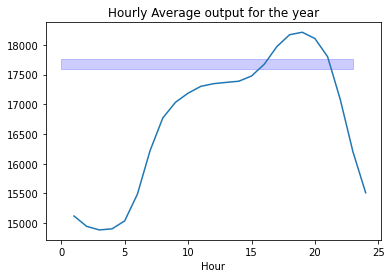

In [142]:
# producing the plot
output_pivot.mean().plot()
    
# Fill the area between median and mean
plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')

# title of the graph
plt.title('Hourly Average output for the year')
plt.show()

We can now investigate deviations from the mean in our output dataframe, as we did with demand and price.

In [104]:
# deviation from the mean
output_deviation = output_pivot - output_pivot.mean()

### Heatmap 

Heatmap helps us to see the all variations (relative to mean value) during the entire year, at a glance. That makes them very useful.

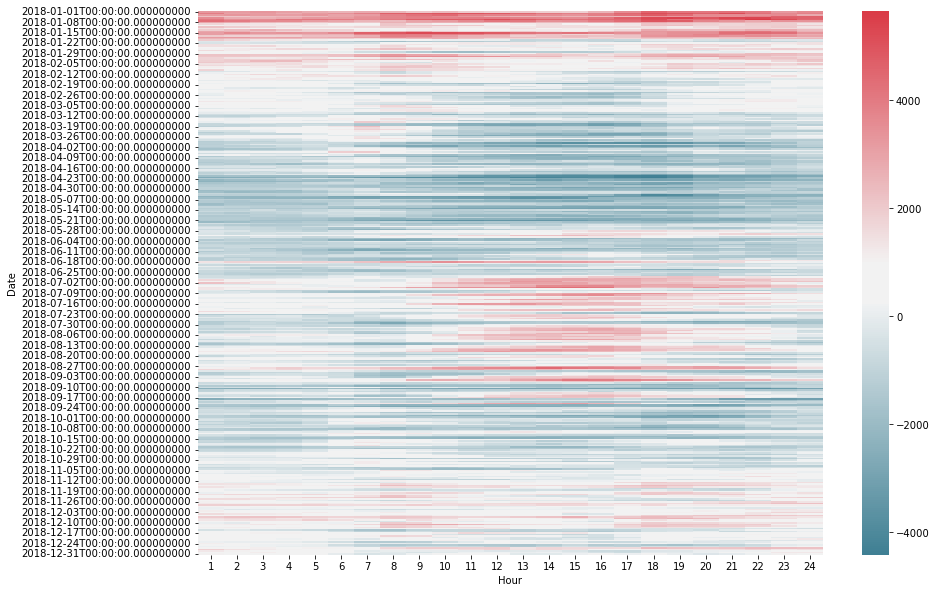

In [105]:
# Initializing the plot
plt.figure(figsize=(14,10))

# Define the custom color map
cmap = sns.diverging_palette(220, 10, sep=20, as_cmap=True)

# heat map
sns.heatmap(output_deviation, cmap=cmap)

plt.show()

The heatmap above exhibits lighter colors during January (when residents are in need of more electricity because of the cold weather) and during July and August (when residents are in need of more electricity because of very warm temperatures which require air conditioning).

Darker colors can be observed during April and October, when temperatures outside are expected to be fairly close to the temperatures that are considered comfortable room temperatures. In other words, temperatures around 15 degrees celsius to 25 degrees celsius are associated with less than average demand for electricity.

We can safely assume that system administrators seek to adjust the system's output in order to meet anticipated demand (chasing demand ex-post if they fail to adequately meet the anticipate demand).

<hr>

### Output/Capacity Ratio

The fact that we have knowledge of the system's capacity to generate electricity, allows us to investigate how much of this capacity is being utilized, in order to meet demand. We can call this variable "Output/Capacity ratio".

Let's start by summing up all of the capacity in the system.

In [118]:
# sum it all up
cap['sum']

0       28628.0
1       28729.0
2       28899.0
3       28583.0
4       29352.0
         ...   
8755    30912.0
8756    30968.0
8757    31016.0
8758    30787.0
8759    31618.0
Name: sum, Length: 8760, dtype: float64

Now we can create this new variable (output/capacity ratio) and save it in a Pandas Series.

In [120]:
output_capacity_ratio = pd.Series(dtype=float)
output_capacity_ratio = output['TOTAL']/cap['sum']

In [121]:
# sanity check
output_capacity_ratio.shape

(8760,)

We can have a look at the distribution of this ratio.

### Distribution

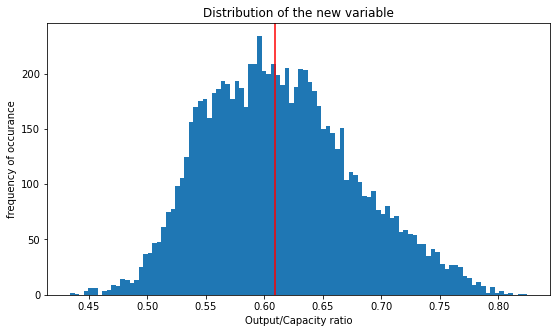

In [129]:
# initializing the plot
plt.figure(figsize=(9,5))

# Histogram
output_capacity_ratio.plot(kind='hist',bins=100)

plt.axvline(output_capacity_ratio.median(), color='red')

plt.title('Distribution of the new variable')

plt.xlabel('Output/Capacity ratio')
plt.ylabel('frequency of occurance')
plt.show()

This distribution indicates that, for at least 50% of duration of the year, Ontario is capable of meeting system's demand with utilizing just a bit more than 60% of its capabilities. However, during peak hours this ratio can climb all the way to 80% and slightly beyond. We may need to investigate this variable further.

<hr>

# <center> Agglomeration of Important Visuals </center>

The three files that we have looked at, thus far, have given us an overview of the electricity market:
 * demand follows a pattern that is in part influenced by the weather;
 * IESO plans electricity output as it anticipates demand fluctuations;
 * prices fluctuate in order to provide incentive for different electricity producers to utilize various technologies (nuclear, hydro, thermal, and others) and offer electricity to the consumers.
 
These variables, are the fabric of the market. They are linked together, and influence one-another. Let's have another glance at these plots.

<hr>

1. Market Demand: 24 hour cycle (annual average, with mean and Median), heatmap.
2. Output: 24 hour cycle (annual average, with mean and Median), heatmap.
3. Price: 24 hour cycle (annual average, with mean and Median), heatmap, Distribution.
4. Output/Capacity ratio: 24 hour cycle, heatmap, distribution.

## Market Demand

#### Average hourly demand

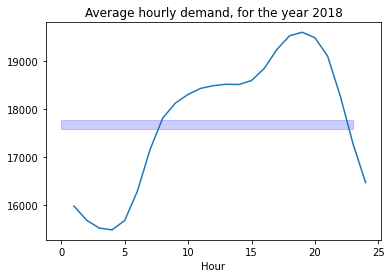

In [140]:
plt.figure()
pivot_d_2018.mean().plot()

# getting the mean and median values
mean_value = d_2018['Market Demand'].mean()
median_value = d_2018['Market Demand'].median()

# Fill the area between median and mean
plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')

# title of the graph
plt.title('Average hourly demand, for the year 2018')
plt.show()

### Heatmap

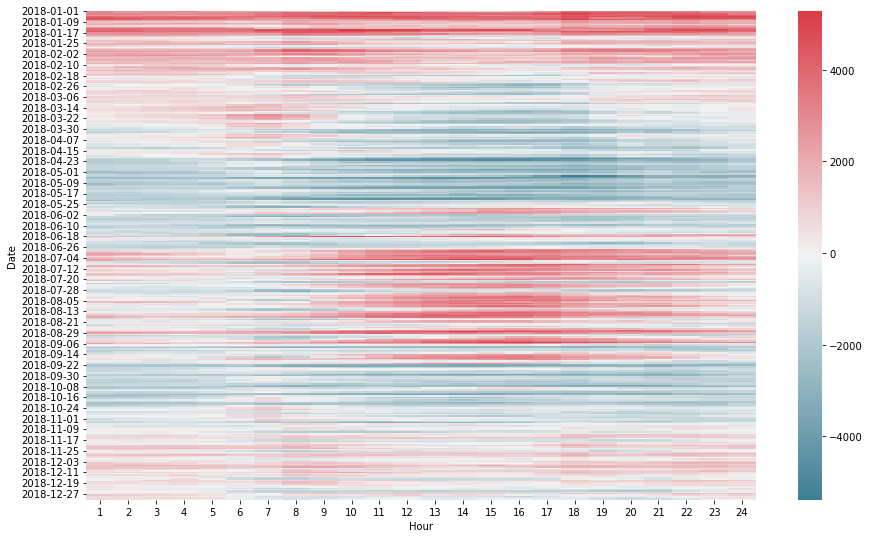

In [143]:
# setting the size of graph
plt.figure(figsize=(15,9))

# Define the custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# producing the graph
sns.heatmap(demand_deviation, cmap=cmap)
plt.show()

## Output (supply)

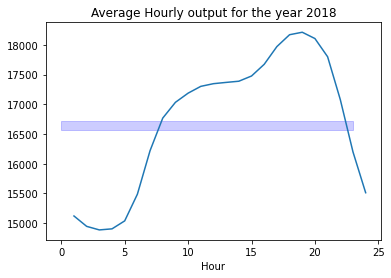

In [150]:
# producing the plot
output_pivot.mean().plot()
    
# getting mean and median values
mean_value = output['TOTAL'].mean()
median_value = output['TOTAL'].median()

# Fill the area between median and mean
plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')

# title of the graph
plt.title('Average Hourly output for the year 2018')
plt.show()

### Heatmap

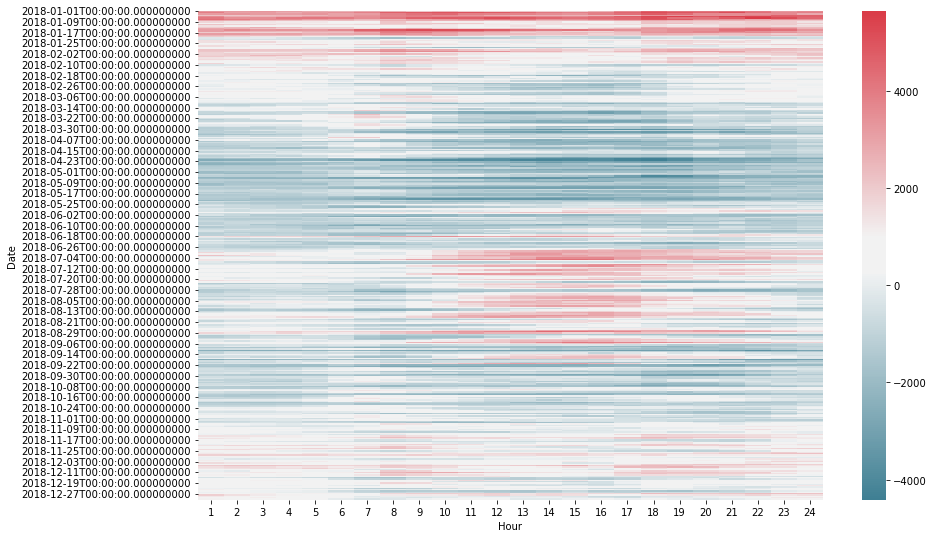

In [145]:
# Initializing the plot
plt.figure(figsize=(14,9))

# Define the custom color map
cmap = sns.diverging_palette(220, 10, sep=20, as_cmap=True)

# heat map
sns.heatmap(output_deviation, cmap=cmap)

plt.show()

## Price

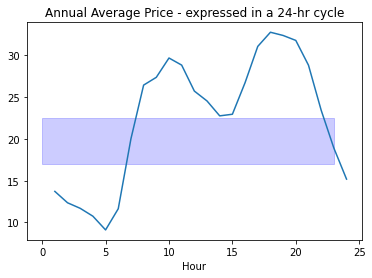

In [146]:
pivoted_pr_2018.mean().plot()

# getting mean and median values
mean_value = pr_2018['HOEP'].mean()
median_value = pr_2018['HOEP'].median()

# Fill the area between median and mean
plt.fill_between(x, mean_value, median_value, color='blue', alpha=0.2, label='Mean and Median')

# We can give it a title
plt.title('Annual Average Price - expressed in a 24-hr cycle')
plt.show()

### Heatmap

<AxesSubplot:title={'center':'Heatmap showing all prices - spikes are dark or red'}, xlabel='Hour', ylabel='Date'>

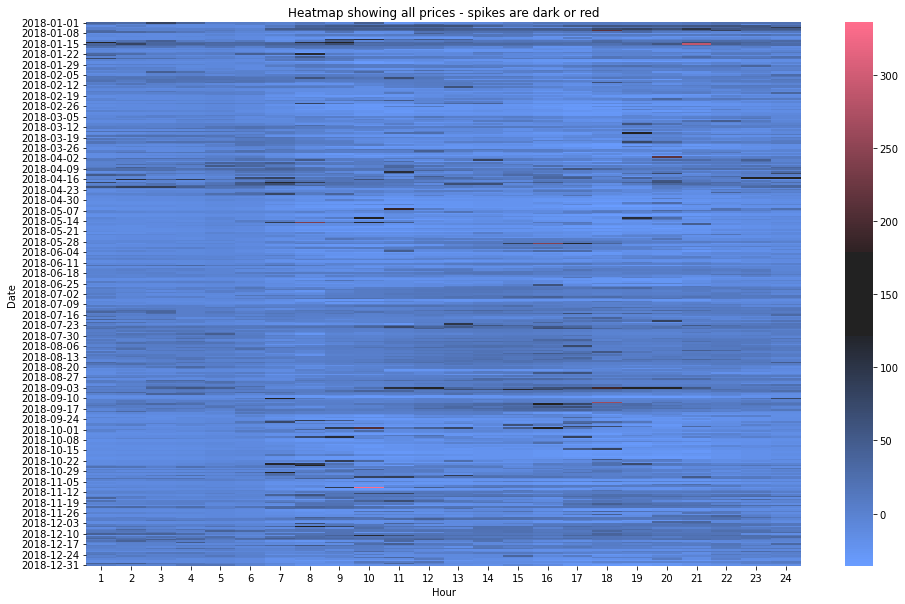

In [148]:
# Set the size of the graph
plt.figure(figsize=(16,10))

# color gradient
cmap = sns.diverging_palette(255, 2, s=100, l=65, sep=40, center="dark", as_cmap=True)

# title of the graph
plt.title('Heatmap showing all prices - spikes are dark or red')

# Produce the Seaborn Heat Map
sns.heatmap(price_spikes, cmap = cmap)

We can clearly see that prices are generally higher during January, July and August, as demand increases and Ontario's power grid experiences more stress. Large price spikes, however, are spread all over the year, with a visible concentration around morning time, and once again between 16h and 20h.

### Distribution

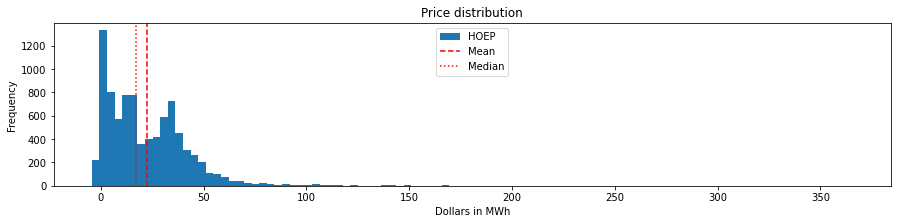

In [149]:
# initiate the plot and setting the size
plt.figure(figsize=(15,3))

# specifying the data column and plot details
pr_2018['HOEP'].plot(kind='hist', bins=100)

# let's get the mean and median values
mean_value = pr_2018['HOEP'].mean()
median_value = pr_2018['HOEP'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='red', linestyle=':', label='Median')

# x-axis title
plt.xlabel('Dollars in MWh')

#title for the plot
plt.title('Price distribution')

# add a legend
plt.legend(loc='upper center')

# show the plot
plt.show()

## Output/Capacity Ratio

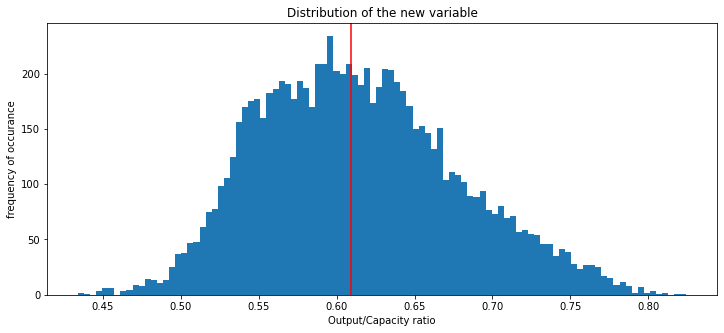

In [152]:
# initializing the plot
plt.figure(figsize=(12,5))

# Histogram
output_capacity_ratio.plot(kind='hist',bins=100)

plt.axvline(output_capacity_ratio.median(), color='red')

# title of the plot
plt.title('Distribution of the new variable')

plt.xlabel('Output/Capacity ratio')
plt.ylabel('frequency of occurance')
plt.show()

<hr>



Text(0.5, 1.0, 'Shape of output - annual average expressed for each hour of the 24-hr cycle')

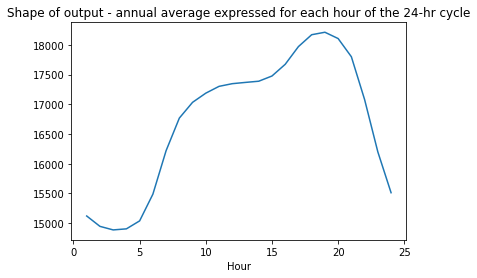

In [159]:
# producing the output plot
output_pivot.mean().plot()
plt.title('Shape of output - annual average expressed for each hour of the 24-hr cycle')

Text(0.5, 1.0, 'Average Demand - Annual average expressed for each hour of the 24-hr cycle')

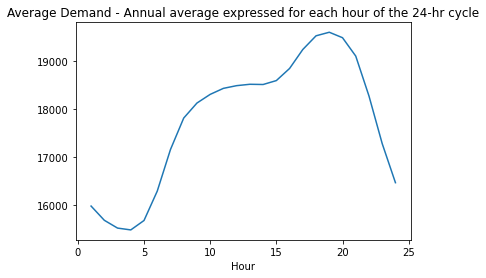

In [160]:
# this graph shows the average price of electricity during the 24-hour cycle, 
# using the 8769 data points, reflecting 365 days of the year.
pivot_d_2018.mean().plot()
plt.title('Average Demand - Annual average expressed for each hour of the 24-hr cycle')

Text(0.5, 1.0, 'Average price - Annual average expressed for each hour of the 24-hr cycle')

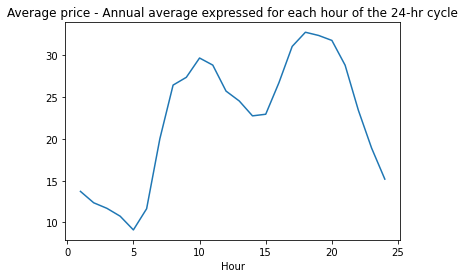

In [161]:
# this graph shows the average price of electricity during the 24-hour cycle, 
# using the 8769 data points, reflecting 365 days of the year.
pivoted_pr_2018.mean().plot()
plt.title('Average price - Annual average expressed for each hour of the 24-hr cycle')

The annual averages (demand and output) which are expressed in hourly terms, show that demand and output follow each other closely. Price (expressed in dollars for each MWh of electricity) exhibits a similar shape. This makes sense, because higher levels of transaction (in form of electricity) puts more stress on the system. And the System Operator (IESO) adjusts the price in order to recuperate the costs incurred for maintenance.

Deviations from the norm, however, are what this analysis is interested in. For this reason, taking another look at the distribution of the price wuld be very helpful.

## Concluding remarks:




This notebook has all the information that a data scientist would need to start a thorough analysis, before indulging in feature engineering. 

The demand fluctuations, output fluctuations, and price fluctuations have been captured and shown in three forms: Line chart, distribution, and heatmap.

We can now begin further analysis by creating new dataframes that include features of interest, and begin modelling and learning.

Before ending this notebook, we will save the important columns as a CSV file.

In [166]:
final_df = pd.DataFrame()
final_df['Date'] = pr_2018['Date']
final_df['Hour'] = pr_2018['Hour']
final_df['Market Demand'] = d_2018['Market Demand']
final_df['Output'] = out['TOTAL']
final_df['Capacity'] = cap['sum']
final_df['Output/Cap ratio'] = new_df['Output/cap ratio']
final_df['Price'] = pr_2018['HOEP']

In [167]:
# sanity check
final_df.head()

,Date,Hour,Market Demand,Output,Capacity,Output/Cap ratio,Price
3,2018-01-01,1,18662.0,17974.0,28583.0,0.628835,51.29
4,2018-01-01,2,18060.0,17797.0,29352.0,0.606330,43.59
5,2018-01-01,3,18429.0,18044.0,29590.0,0.609801,93.60
6,2018-01-01,4,19137.0,19004.0,29902.0,0.635543,54.78
7,2018-01-01,5,19470.0,19280.0,30079.0,0.640979,14.35


In [168]:
#saving the file
final_df.to_csv('data_step_one.csv')